In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadasalem81","key":"533c66068bcc937ae5bee94405d25391"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dhruvildave/english-handwritten-characters-dataset
!unzip english-handwritten-characters-dataset.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset
License(s): ODbL-1.0
  0% 0.00/13.1M [00:00<?, ?B/s]
100% 13.1M/13.1M [00:00<00:00, 195MB/s]
unzip:  cannot find or open english-handwritten-characters-dataset.zip -d dataset, english-handwritten-characters-dataset.zip -d dataset.zip or english-handwritten-characters-dataset.zip -d dataset.ZIP.


In [ ]:
!ls

english-handwritten-characters-dataset.zip  sample_data


In [ ]:
import zipfile
import os

zip_path = "english-handwritten-characters-dataset.zip"

extract_path = "dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Decompressed", extract_path)

Decompressed dataset


In [ ]:
!ls dataset

english.csv  Img


In [ ]:
!pip install tensorflow
!pip install keras
!pip install opencv-python

Attempting to read CSV from: /content/dataset/english.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 486s 22s/step - accuracy: 0.0150 - loss: 4.2208 - val_accuracy: 0.0191 - val_loss: 4.1364 - learning_rate: 0.0010
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 462s 21s/step - accuracy: 0.0153 - loss: 4.1460 - val_accuracy: 0.0147 - val_loss: 4.1091 - learning_rate: 0.0010
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 464s 21s/step - accuracy: 0.0216 - loss: 4.0684 - val_accuracy: 0.0674 - val_loss: 3.6546 - learning_rate: 0.0010
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 476s 22s/step - accuracy: 0.0818 - loss: 3.6361 - val_accuracy: 0.1334 - val_loss: 3.2327 - learning_rate: 0.0010
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 472s 22s/step - accuracy: 0.1032 - loss: 3.3419 - val_accuracy: 0.1657 - val_loss: 2.9908 - learning_rate: 0.0010
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 472s 22s/step - accuracy: 0.1482 - loss: 3.0518 - val_accuracy: 0.2082 - val_loss: 2.7412 - learning_rate: 0.0010
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 462s 21s/step - accuracy: 0.2123 - loss: 2.7713 - val_accurac

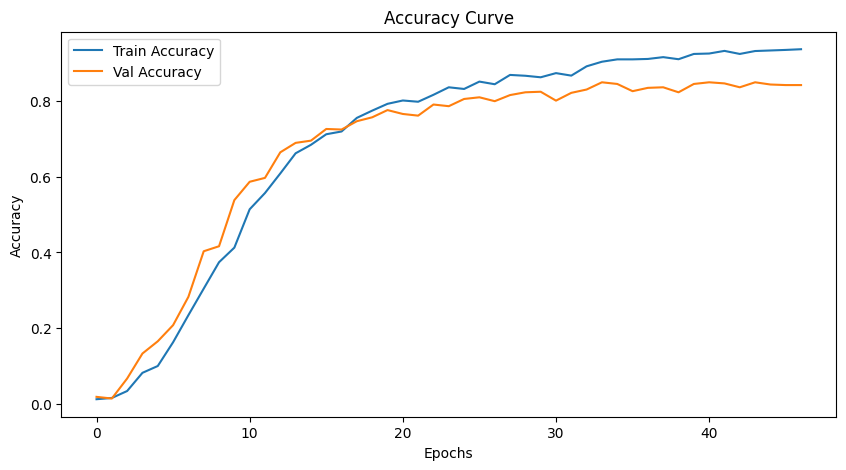

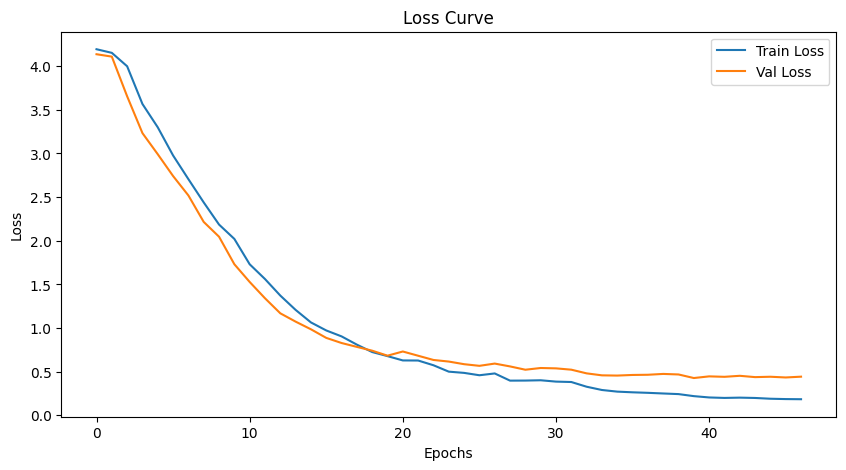

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# ================== Load Dataset ==================
csv_path = os.path.abspath(os.path.join("dataset", "english.csv"))
print(f"Attempting to read CSV from: {csv_path}")
df = pd.read_csv(csv_path)


images, labels = [], []
for idx, row in df.iterrows():
    img_path = os.path.join("dataset", row['image'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # read in grayscale
    img = cv2.resize(img, (64, 64))  # resize to 64x64
    images.append(img)
    labels.append(row['label'])

X = np.array(images).reshape(-1, 64, 64, 1) / 255.0  # normalize
y = np.array(labels)

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y, num_classes=len(encoder.classes_))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== Data Augmentation ==================
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

# ================== CNN Model ==================
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(2,2)) # Corrected typo
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2)) # Corrected typo
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2)) # Corrected typo

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(len(encoder.classes_),activation='softmax')) # Corrected output layer size

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Corrected loss function

# ================== Callbacks ==================
callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)
]

# ================== Train Model ==================
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

# ================== Evaluate ==================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# ================== Plot Training History ==================
# Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# ================== Predict on Test Set ==================
y_pred_prob = model.predict(X_test)          # probabilities
y_pred = np.argmax(y_pred_prob, axis=1)      # predicted labels
y_true = np.argmax(y_test, axis=1)           # true labels

# ================== Confusion Matrix ==================
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# ================== Classification Report ==================
report = classification_report(y_true, y_pred, target_names=encoder.classes_)
print("\nClassification Report:")
print(report)

22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step
Confusion Matrix:
[[ 4  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.60      0.55      0.57        11
           2       1.00      1.00      1.00        11
           3       0.75      0.82      0.78        11
           4       1.00      0.82      0.90        11
           5       0.73      1.00      0.85        11
           6       0.92      1.00      0.96        11
           7       0.92      1.00      0.96        11
           8       0.92      1.00      0.96        11
           9       0.89      0.73      0.80        11
           A       0.92      1.00      0.96        11
           B       1.00      0.91      0.95        11
           C       0.77      0.91      0.83        11
      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


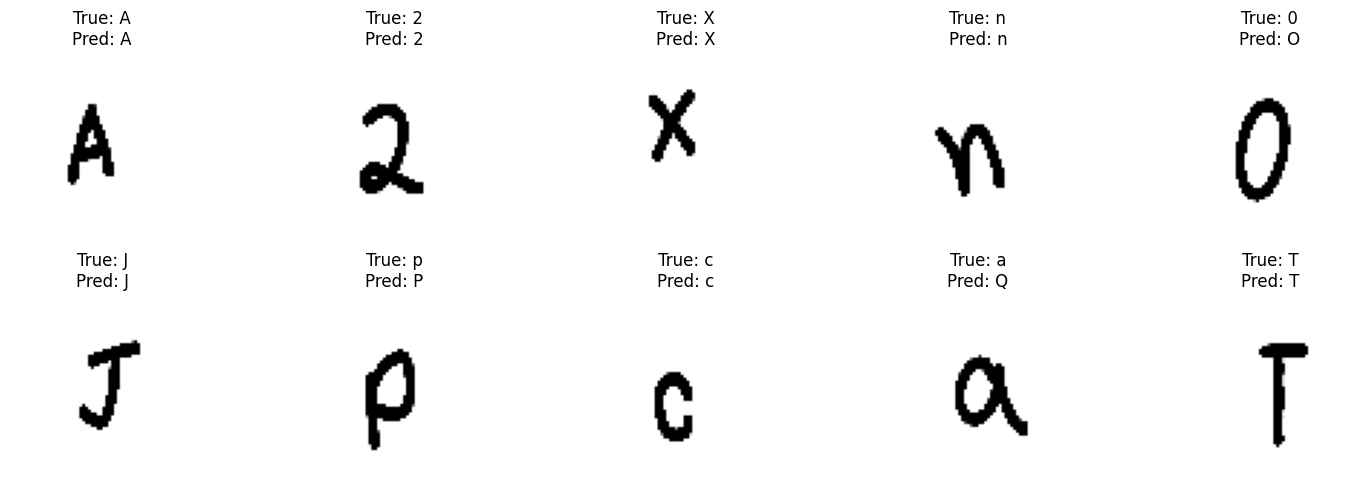

In [23]:
import random
import matplotlib.pyplot as plt

num_samples = 10
indices = random.sample(range(len(X_test)), num_samples)

plt.figure(figsize=(15,5))

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(64,64)
    true_label = encoder.inverse_transform([np.argmax(y_test[idx])])[0]
    pred_label = encoder.inverse_transform([np.argmax(model.predict(X_test[idx].reshape(1,64,64,1)))])[0]

    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()